In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [3]:
 !pip install timm pandas requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [4]:
import os
ds_path = "/content/drive/MyDrive/datasets/Caltech Challenge/256_ObjectCategories/"

print(sorted(os.listdir(ds_path)))
print(len(sorted(os.listdir(ds_path))))

['001.ak47', '002.american-flag', '003.backpack', '004.baseball-bat', '005.baseball-glove', '006.basketball-hoop', '007.bat', '008.bathtub', '009.bear', '010.beer-mug', '011.billiards', '012.binoculars', '013.birdbath', '014.blimp', '015.bonsai-101', '016.boom-box', '017.bowling-ball', '018.bowling-pin', '019.boxing-glove', '020.brain-101', '021.breadmaker', '022.buddha-101', '023.bulldozer', '024.butterfly', '025.cactus', '026.cake', '027.calculator', '028.camel', '029.cannon', '030.canoe', '031.car-tire', '032.cartman', '033.cd', '034.centipede', '035.cereal-box', '036.chandelier-101', '037.chess-board', '038.chimp', '039.chopsticks', '040.cockroach', '041.coffee-mug', '042.coffin', '043.coin', '044.comet', '045.computer-keyboard', '046.computer-monitor', '047.computer-mouse', '048.conch', '049.cormorant', '050.covered-wagon', '051.cowboy-hat', '052.crab-101', '053.desk-globe', '054.diamond-ring', '055.dice', '056.dog', '057.dolphin-101', '058.doorknob', '059.drinking-straw', '060.du

In [5]:
# from PIL import Image
# import cv2
# for folder in os.listdir(ds_path):
#   print(folder)
#   print(len(os.listdir(f"{ds_path}/{folder}")))
#   # for img in os.listdir(f"{ds_path}/{folder}")[:5]:
#   #   print(img)
#   #   imgpil = Image.open(f"{ds_path}/{folder}/{img}")
#   #   imgpil = imgpil.resize((224, 224))
#   #   print(imgpil.width,imgpil.height)
#   #   npimg = np.array(imgpil)
#   #   plt.imshow(npimg)
#   #   plt.show()
#   print("---------------------------")

In [16]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, WeightedRandomSampler
import numpy as np

# Define data augmentation transforms for training data
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),     # Random crop and resize
    transforms.RandomHorizontalFlip(),     # Random horizontal flip
    transforms.ColorJitter(),              # Random color jitter
    transforms.RandomRotation(10),         # Random rotation
    transforms.ToTensor(),                 # Convert images to PyTorch tensors
    transforms.Normalize(                  # Normalize image tensors
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Define transforms for validation data (without augmentation)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),        # Resize images to 229x229
    transforms.ToTensor(),                 # Convert images to PyTorch tensors
    transforms.Normalize(                  # Normalize image tensors
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Load the dataset
dataset = datasets.ImageFolder(root=ds_path)

# Calculate the sizes for train and validation datasets
total_data = len(dataset)
train_size = int(0.9 * total_data)
val_size = total_data - train_size

# Split the dataset into train and val
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Apply transforms to train and val datasets
train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_transform

# Calculate class weights for WeightedRandomSampler
class_counts = np.bincount(train_dataset.dataset.targets)
class_weights = 1 / torch.tensor(class_counts, dtype=torch.float)

# Create a sampler to balance classes in the training set
train_sampler = WeightedRandomSampler(weights=class_weights, num_samples=train_size)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, sampler=train_sampler)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


Batch 1 (Training)


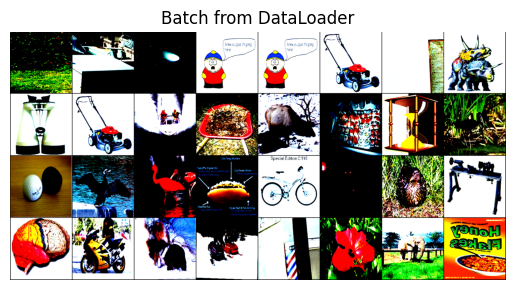

Labels (Numerical): tensor([256, 256,  43,  31,  31, 181, 256, 227,  11, 181, 196, 243,  64, 205,
        109, 113,  87,  48, 113, 107, 223, 143,  59, 127,  19, 144,  55, 191,
        256, 102,  63,  34])
Labels (Original): ['257.clutter', '257.clutter', '044.comet', '032.cartman', '032.cartman', '182.self-propelled-lawn-mower', '257.clutter', '228.triceratops', '012.binoculars', '182.self-propelled-lawn-mower', '197.speed-boat', '244.wheelbarrow', '065.elk', '206.sushi', '110.hourglass', '114.ibis-101', '088.golf-ball', '049.cormorant', '114.ibis-101', '108.hot-dog', '224.touring-bike', '144.minotaur', '060.duck', '128.lathe', '020.brain-101', '145.motorbikes-101', '056.dog', '192.snowmobile', '257.clutter', '103.hibiscus', '064.elephant-101', '035.cereal-box']


Batch 1 (Validation)


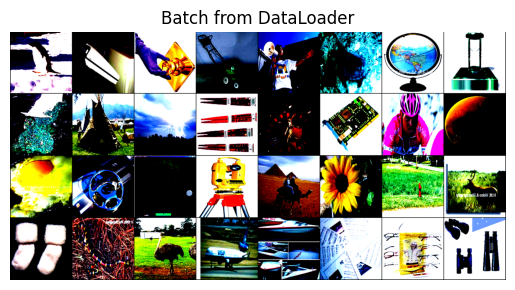

Labels (Numerical): tensor([157, 237,  57, 181, 138,  99,  52, 109, 147, 213, 132,  38, 174, 156,
        158, 136,  77, 201,  14, 218,  27, 203,  70,  64, 193, 189, 150, 250,
        196, 183,  66,  11])
Labels (Original): ['158.penguin', '238.video-projector', '058.doorknob', '182.self-propelled-lawn-mower', '139.megaphone', '100.hawksbill-101', '053.desk-globe', '110.hourglass', '148.mussels', '214.teepee', '133.lightning', '039.chopsticks', '175.roulette-wheel', '157.pci-card', '159.people', '137.mars', '078.fried-egg', '202.steering-wheel', '015.bonsai-101', '219.theodolite', '028.camel', '204.sunflower-101', '071.fire-hydrant', '065.elk', '194.socks', '190.snake', '151.ostrich', '251.airplanes-101', '197.speed-boat', '184.sheet-music', '067.eyeglasses', '012.binoculars']


In [17]:
import torchvision

# Get the class names from the dataset
class_names = train_dataset.dataset.classes

# Define a function to display images from a batch with original label names
def show_images_with_labels(images, labels, class_names):
    # Make a grid from batch
    grid = torchvision.utils.make_grid(images, nrow=8)
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.title('Batch from DataLoader')
    plt.axis('off')
    plt.show()
    print('Labels (Numerical):', labels)
    print('Labels (Original):', [class_names[label] for label in labels])

# Iterate over batches in train_loader and val_loader
for batch_idx, (images, labels) in enumerate(train_loader):
    print(f'Batch {batch_idx + 1} (Training)')
    show_images_with_labels(images, labels, class_names)
    break  # Break after printing the first batch for demonstration

for batch_idx, (images, labels) in enumerate(val_loader):
    print(f'Batch {batch_idx + 1} (Validation)')
    show_images_with_labels(images, labels, class_names)
    break  # Break after printing the first batch for demonstration


In [18]:
len(train_dataset.dataset.classes)

257

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

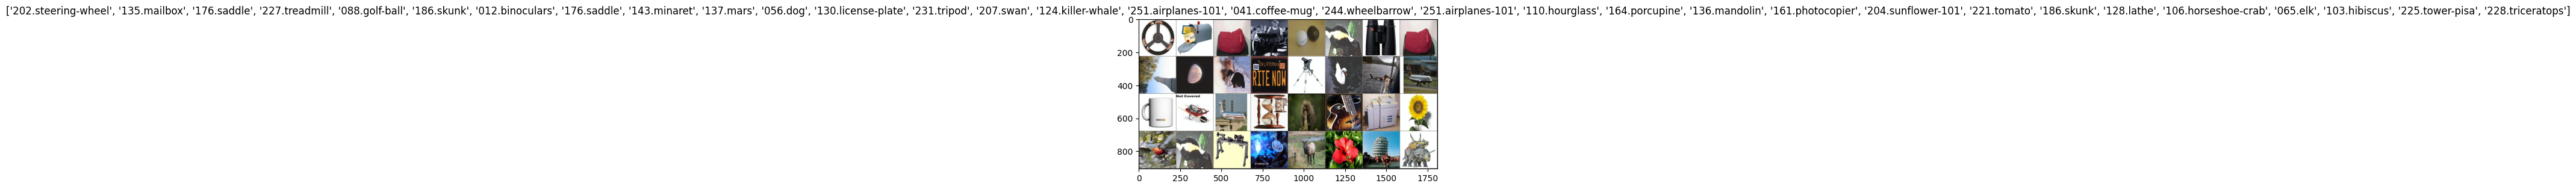

In [20]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [21]:
len(train_dataset)

27546

In [22]:
len(val_dataset)

3061

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def train_model(model, criterion, optimizer, scheduler, num_epochs=5):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    dataloader = train_loader
                    model.train()  # Set model to training mode
                else:
                    dataloader = val_loader
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloader:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                if phase == "train":
                  dataset_size = len(train_dataset)
                else:
                  dataset_size = len(val_dataset)
                epoch_loss = running_loss / dataset_size
                epoch_acc = running_corrects.double() / dataset_size

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model



# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import models
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader

# Define additional layers with dropout and regularization
class AdditionalLayers(nn.Module):
    def __init__(self, in_features, num_classes):
        super(AdditionalLayers, self).__init__()
        self.fc1 = nn.Linear(in_features, 512)
        self.dropout1 = nn.Dropout(0.5)  # Dropout layer after first fully connected layer
        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.5)  # Dropout layer after second fully connected layer
        self.fc3 = nn.Linear(256, num_classes)
        self.dropout3 = nn.Dropout(0.5)  # Dropout layer after third fully connected layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

num_classes = 257
batch_size = 32

# Load pre-trained ResNet101 model
model_conv = models.resnet101(pretrained=True)

# Freeze all layers except the final classification layer
for param in model_conv.parameters():
    param.requires_grad = False

# Replace the final classification layer with additional layers
num_ftrs = model_conv.fc.in_features
model_conv.fc = AdditionalLayers(num_ftrs, num_classes)

# Define device (GPU if available, else CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_conv = model_conv.to(device)

# # Define dataloaders for training and validation
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Use Adam optimizer
optimizer_conv = optim.Adam(model_conv.parameters(), lr=0.001)

# Define learning rate scheduler
scheduler = exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

# Train the model
model_conv = train_model(model_conv, criterion, optimizer_conv, scheduler, num_epochs=5)

# Save the trained model
torch.save(model_conv.state_dict(), 'best_model.pt')


# model_conv = torchvision.models.resnet50(weights='IMAGENET1K_V2')
# # model_conv = models.inception_v3(pretrained=True)
# # for param in model_conv.parameters():
# #     param.requires_grad = False

# # Parameters of newly constructed modules have requires_grad=True by default
# num_ftrs = model_conv.fc.in_features
# model_conv.fc = nn.Linear(num_ftrs, 257)

# # num_ftrs = model_conv.AuxLogits.fc.in_features
# # model_conv.AuxLogits.fc = nn.Linear(num_ftrs, 2)
# # # Handle the primary net
# # num_ftrs = model_conv.fc.in_features
# # model_conv.fc = nn.Linear(num_ftrs, 2)


# model_conv = model_conv.to(device)

# criterion = nn.CrossEntropyLoss()

# # Observe that only parameters of final layer are being optimized as
# # opposed to before.
# optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# # Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

# model_conv = train_model(model_conv, criterion, optimizer_conv,
#                          exp_lr_scheduler, num_epochs=5)

Epoch 0/4
----------
train Loss: 1.3776 Acc: 0.6924
val Loss: 7.3294 Acc: 0.2992

Epoch 1/4
----------
train Loss: 0.1605 Acc: 0.9514
val Loss: 8.6302 Acc: 0.2979

Epoch 2/4
----------
train Loss: 0.1311 Acc: 0.9593
val Loss: 8.5572 Acc: 0.3025

Epoch 3/4
----------
train Loss: 0.1298 Acc: 0.9598
val Loss: 9.5462 Acc: 0.2986

Epoch 4/4
----------
train Loss: 0.1339 Acc: 0.9592
val Loss: 10.9211 Acc: 0.2911

Training complete in 41m 18s
Best val Acc: 0.302516


In [ ]:
# Train the model
model_conv = train_model(model_conv, criterion, optimizer_conv, scheduler, num_epochs=15)

# Save the trained model
torch.save(model_conv.state_dict(), 'best_model.pt')

Epoch 0/14
----------
train Loss: 0.1221 Acc: 0.9611
val Loss: 9.7142 Acc: 0.3002

Epoch 1/14
----------
train Loss: 0.1380 Acc: 0.9585
val Loss: 10.2638 Acc: 0.3022

Epoch 2/14
----------
train Loss: 0.0524 Acc: 0.9838
val Loss: 10.5758 Acc: 0.3159

Epoch 3/14
----------
train Loss: 0.0341 Acc: 0.9884
val Loss: 10.6139 Acc: 0.3149

Epoch 4/14
----------
train Loss: 0.0325 Acc: 0.9897
val Loss: 10.7158 Acc: 0.3175

Epoch 5/14
----------
train Loss: 0.0261 Acc: 0.9919
val Loss: 11.2623 Acc: 0.3133

Epoch 6/14
----------
train Loss: 0.0225 Acc: 0.9928
val Loss: 11.7480 Acc: 0.3143

Epoch 7/14
----------


KeyboardInterrupt: 

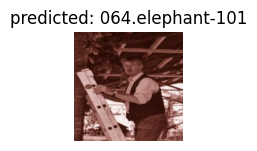

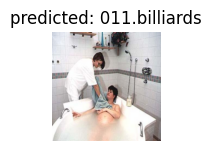

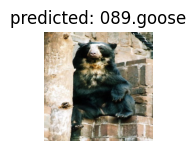

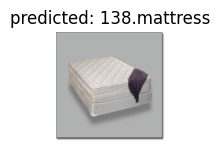

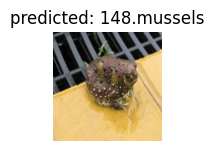

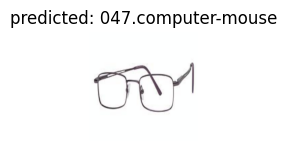

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

visualize_model(model_conv)


Other approches considered are visual transformers.